

# Unit 3 Supervised Learning Capstone Project: 
## Prediction of Alcohol Consumption in Portuguese Students
By Tiani Calip

### Background:
The data were obtained in a survey of students in Portuguese language courses in secondary school. Many techniques (hypothesis testing, predictive analysis, visualizations, etc.) can be used to answer different research questions about the population

### Executive Summary 
Americans have a common misconception that young people in European countries are introduced to alcohol in a cultural context at a younger age, which reduces heavy and harmful drinking. It is believed that, with younger drinking ages, they can learn to drink within family settings where moderate drinking is the norm. This perception is used as support for changes in the American legal drinking age so that the United States youth drink less, binge less, and have less alcohol related problems. Research does not support these views, as summarized in the U.S. Department of Justice paper, "Youth Drinking Rates and Problems: A Comparison of European Countries and the United States" (http://www.pire.org/documents/UDETC/other-support/YouthDrinkingRatesandProblems.pdf).

The purpose of this case study is to highlight habits of Portuguese Secondary School students, based on the attributes listed out below, and to predict how much a given student will drink during either the workday or the weekend. It is important to know that the legal drinking age in Portugal is 18, but many of these students report drinking under that legal age. In order to conduct this analysis, open source data was used from https://www.kaggle.com/uciml/student-alcohol-consumption and the program Python will be utlized to conduct the analysis.

There were over 600 students surveyed on student demographics, preferences, and academic performance. Ratings were measured on a scale of 1 to 5, yes or no, or with other binary options, explained below.

The questions that this case study will delve deeper into are:   
1) What attributes are good predictors for alcohol consumption of youth?  
2) What classification models are the best for predicting youth alcohol consumption?  

__This analysis will bring some insight into youth habits, especially alcohol consumption. It will be possible to perhaps see a pattern in the data that could lead us to observe what specific habits or attributes might be predictors for underaged drinking. Finally, it will show us what supervised learning classification models learned in this Thinkful course are best suited to do this analysis.__


__Column Header Key:__
- school- Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex- Student's sex (binary: 'F' - female or 'M' - male)
- age- Student's age (numeric: from 15 to 22)
- address- Student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize- Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
- Pstatus- Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart)  
- Medu- Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)  
- Fedu- Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
- Mjob- Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
- Fjob- Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
- reason- Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
- guardian- Student's guardian (nominal: 'mother', 'father' or 'other')  
- traveltime- Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
- studytime- Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
- failures- Number of past class failures (numeric: n if 1<=n<3, else 4)  
- schoolsup- Extra educational support (binary: yes or no)  
- famsup- Family educational support (binary: yes or no)  
- paid- Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
- activities- Extra-curricular activities (binary: yes or no)  
- nursery- Attended nursery school (binary: yes or no)  
- higher- Wants to take higher education (binary: yes or no)  
- internet- Internet access at home (binary: yes or no)  
- romantic- With a romantic relationship (binary: yes or no)
- famrel- Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime- Free time after school (numeric: from 1 - very low to 5 - very high)
- goout- Going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc- Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc- Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health- Current health status (numeric: from 1 - very bad to 5 - very good)
- absences- Number of school absences (numeric: from 0 to 93)
- G1- First period grade (numeric: from 0 to 20)
- G2- Second period grade (numeric: from 0 to 20)
- G3- Final grade (numeric: from 0 to 20, output target)

### Source Information
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th Future Business Technology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

In [1]:
# import all the modules I need
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.pyplot as plt  # side-stepping mpl backend
import matplotlib.gridspec as gridspec  # subplots
import seaborn as sns
sns.set(style="whitegrid")

# Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC  # support vector classification
from sklearn.cross_validation import KFold  # For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# import the data tables I downloaded
df = pd.DataFrame()

# responses from the Portuguese language class students
df = pd.read_csv("student-por.csv")

# styling so I can see all the columns
pd.set_option('display.max_columns', 150)
plt.style.use('bmh')
from IPython.display import display

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Visualize our dataframe for the first time
print(df.shape)
df

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


### Dataframe Observations
We are looking at a dataset of 649 students from two different secondary schools who have varying attributes (gender, family backgrounds, and academic performance to name a few).

The data is comprised of both numerical and catagorical data. We will first look at the numerical data and then do some feature engineering to take a look at the other attributes of the students.

In [3]:
# veryfy no null info in data set
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
# Isolate the numerical data into a separate dataframe
df_numerical = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                   'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

In [5]:
# Drop missing values and reset the index
df_numerical = df_numerical.dropna()

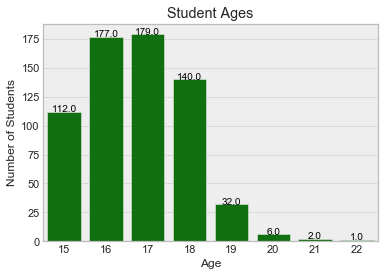

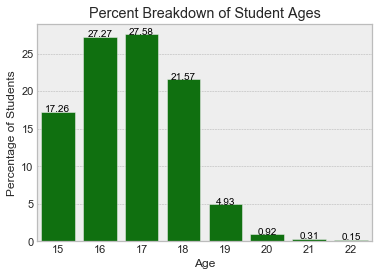

In [6]:
# Count the amount of  students had reported from 1 (very low) to 5 (very high) weekday alcohol consumption
# I need to change the column titles of these. how?
ages = pd.DataFrame()
ages = df_numerical['age'].value_counts()
ages = ages.reset_index()
ages = ages.sort_values(by='index').reset_index()
ages['percent'] = ages['age']/ages['age'].sum()
ages['percent'] = ages['percent']*100
# Show the standard error of the mean workday alcohol consumption from 1 (very low) to 5 (very high) with error bars:
agex = sns.barplot(x="index", y="age", data=ages, color='green')
agex.set(title='Student Ages', xlabel='Age', ylabel='Number of Students')
for index, row in ages.iterrows():
    agex.text(row.name, row.age, round(row.age, 2), color='black', ha="center")
plt.show()

# view as percentages
age_percent_x = sns.barplot(x="index", y="percent", data=ages, color='green')
age_percent_x.set(title='Percent Breakdown of Student Ages',
                  xlabel='Age', ylabel="Percentage of Students")
for index, row in ages.iterrows():
    age_percent_x.text(row.name, row.percent, round(
        row.percent, 2), color='black', ha="center")
plt.show()

A majority of the students surveyed are under 20 years old. Age may prove to be a good area for feature engineering later on, as the 3 students who are over 20 years old may skew the data.

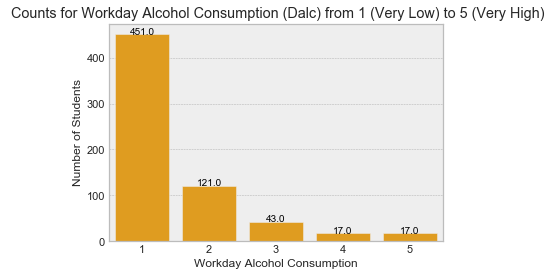

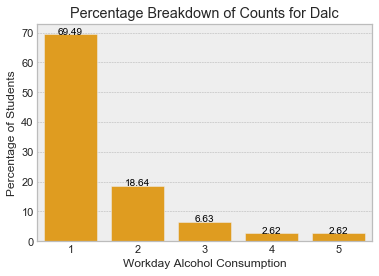

In [7]:
# Count the amount of  students had reported from 1 (very low) to 5 (very high) weekday alcohol consumption
# need to change column names on this too

dalc = pd.DataFrame()
dalc = df_numerical['Dalc'].value_counts()
dalc = dalc.reset_index()
dalc['percent'] = dalc['Dalc']/dalc['Dalc'].sum()
dalc['percent'] = dalc['percent']*100

# Show the standard error of the mean workday alcohol consumption from 1 (very low) to 5 (very high) with error bars:
dx = sns.barplot(x="index", y="Dalc", data=dalc, color='Orange')
dx.set(title=' Counts for Workday Alcohol Consumption (Dalc) from 1 (Very Low) to 5 (Very High)',
       xlabel='Workday Alcohol Consumption', ylabel='Number of Students')
for index, row in dalc.iterrows():
    dx.text(row.name, row.Dalc, round(row.Dalc, 2), color='black', ha="center")
plt.show()

# view as percentages
d_percent_x = sns.barplot(x="index", y="percent", data=dalc, color='orange')
d_percent_x.set(title='Percentage Breakdown of Counts for Dalc',
                xlabel='Workday Alcohol Consumption', ylabel='Percentage of Students')
for index, row in dalc.iterrows():
    d_percent_x.text(row.name, row.percent, round(
        row.percent, 2), color='black', ha="center")
plt.show()

Students are generally drinking at very low amounts during the week, with relatively few students reporting a high to very high alcohol consumption.

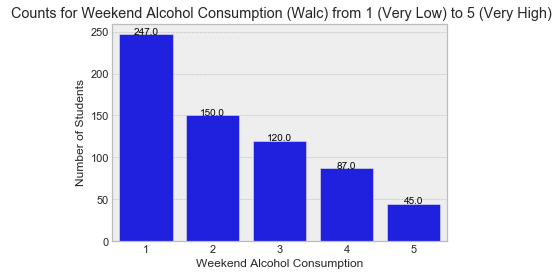

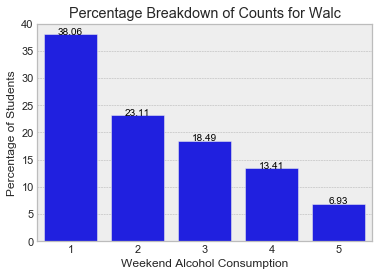

In [8]:
# Count the amount of  students had reported from 1 (very low) to 5 (very high) weekend alcohol consumption
# Need to fix column names

walc = pd.DataFrame()
walc = df_numerical['Walc'].value_counts()
walc = walc.reset_index()
walc['percent'] = walc['Walc']/walc['Walc'].sum()
walc['percent'] = walc['percent']*100

# Show the standard error of the mean workday alcohol consumption from 1 (very low) to 5 (very high) with error bars:
wx = sns.barplot(x="index", y="Walc", data=walc, color='blue')
wx.set(title=' Counts for Weekend Alcohol Consumption (Walc) from 1 (Very Low) to 5 (Very High)',
       xlabel='Weekend Alcohol Consumption', ylabel='Number of Students')
for index, row in walc.iterrows():
    wx.text(row.name, row.Walc, round(row.Walc, 2), color='black', ha="center")
plt.show()

# view as percentages
w_percent_x = sns.barplot(x="index", y="percent", data=walc, color='blue')
w_percent_x.set(title='Percentage Breakdown of Counts for Walc',
                xlabel='Weekend Alcohol Consumption', ylabel='Percentage of Students')
for index, row in walc.iterrows():
    w_percent_x.text(row.name, row.percent, round(
        row.percent, 2), color='black', ha="center")
plt.show()

The number of students who reported higher amounts of drinking increased for the weekend! Students reporting 1 or very low amounts of alcohol consumption decreased by 30% on the weekends, and the reportings of higher consumption all went up  by 2, 3, or 4 times that of the workday consumption.

Let's break down the drinking habits by age and gender to see if we can find out more about the sample population

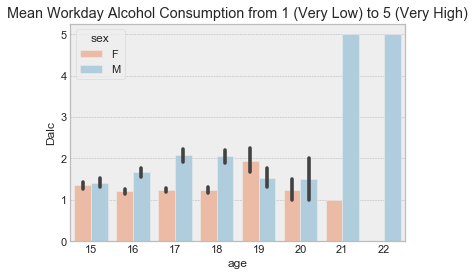

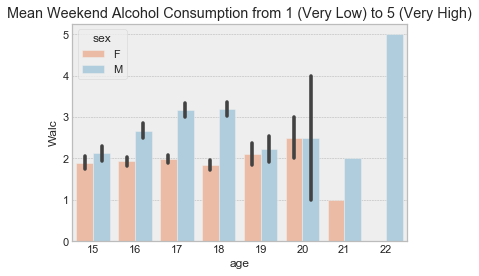

In [9]:
# Show the standard error of the mean workday alcohol consumption from 1 (very low) to 5 (very high) with error bars,
# separate out age and gender
ax = sns.barplot(x="age", y="Dalc", data=df, hue='sex', palette='RdBu', ci=68)
ax.set(title='Mean Workday Alcohol Consumption from 1 (Very Low) to 5 (Very High)')
plt.show()

# Show the standard error of the mean weekend alcohol consumption from 1 (very low) to 5 (very high) with error bars
# separate out age and gender
bx = sns.barplot(x="age", y="Walc", data=df, hue='sex', palette='RdBu', ci=68)
bx.set(title='Mean Weekend Alcohol Consumption from 1 (Very Low) to 5 (Very High)')
plt.show()

During the week, students don't generally drink much. But when it hits the weekend, all the age and gender groups seem to drink more than during the week.
We see that males qualitatively drink more than females, especially the older males.  
However, we must keep in mind that there is only one 22 year-old (who seems to always report a drinking score of 5, and there are only 2 (looks like 1 boy and 1 girl) 21 year-olds who also skew the data).

I saw qualitatively because we have not seen if we can compare the data with statistical significance. In order to do that, we need to verify if the data is normal first. So, we will do visualizations of the data, below.

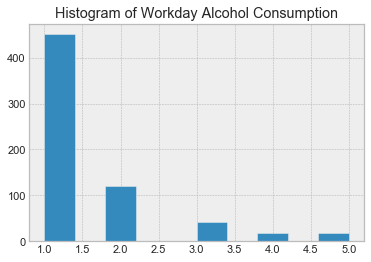

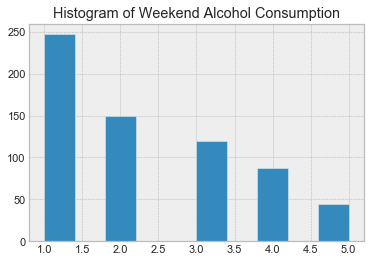

In [10]:
# check if distribution of data is normal
d_hist = plt.hist(df.Dalc)
plt.title('Histogram of Workday Alcohol Consumption')
plt.show()
w_hist = plt.hist(df.Walc)
plt.title('Histogram of Weekend Alcohol Consumption')
plt.show()

# make a QQ plot to test normality
# Making a standard normally distributed variable with 1000 observations,
# a mean of 0, and standard deviation of 1 that we will use as our “comparison.”
norm = np.random.normal(0, 1, 649)
# Sorting the values in ascending order.
norm.sort()

We tried using histograms to check if the data is normal and if we can do ttest statistics on it. As we see here, the data is skewed and therefore unnormal. This means we cannot do the standard ttests on the Walc or Dalc data to see if we can quantitatively say with statistical significance that males drink more than females and that weekends have more drinking than workdays.

Next, let's start to identify what attributes of the students might be good predictors for alcohol consumption.
First, let's look at differences between schools. Answers were binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira.

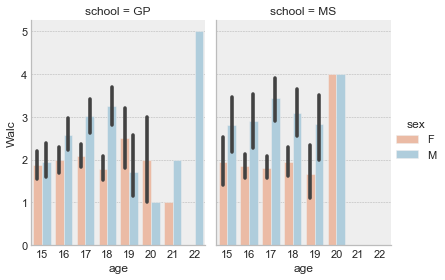

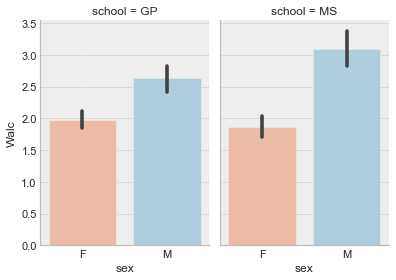

In [11]:
cx = sns.catplot(x="age", y="Walc",
                 hue="sex", col="school",
                 data=df, kind="bar",
                 palette='RdBu', height=4, aspect=.7)
plt.show()

cx_noage = sns.catplot(x="sex", y="Walc", col="school",
                       data=df, kind="bar", palette='RdBu', height=4, aspect=.7)

From the first set of graphs, it seems like the heaviest drinkers are in the Gabriel Pereira school. However, the data is skewed because of the heaviest drinnkers being just a few males in the higher ages. When we group the data a different way, not separated by age, we can see that the females from both schools drink about the same amount, but that the males from Mousinho da Silveira on average drink more! So, the top two ages must be skewing the data. 

Lastly, let's take a closer look at if there is a difference between alhocol consumption and grades. Perhaps there is a great correlation between the two that might be interesting.

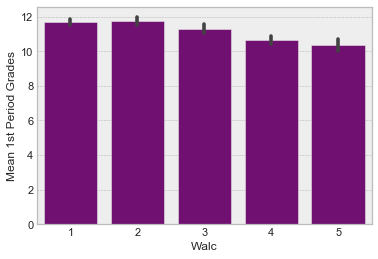

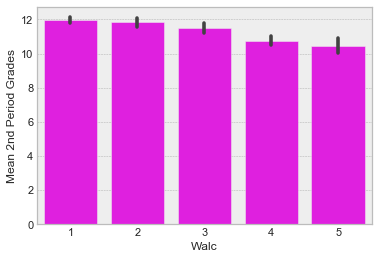

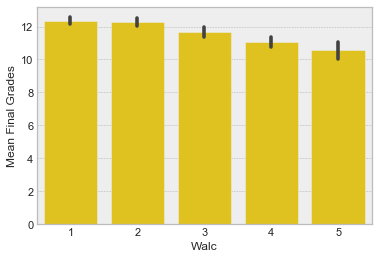

In [12]:
# Show the standard error of the mean 1st period grades with error bars
# don't separate out age and gender
g1x = sns.barplot(x="Walc", y="G1", data=df, ci=68, color='purple')
g1x.set(ylabel='Mean 1st Period Grades')
plt.show()

# Show the standard error of the mean 2nd period grades with error bars
# don't separate out age and gender
g1x = sns.barplot(x="Walc", y="G2", data=df, ci=68, color='magenta')
g1x.set(ylabel='Mean 2nd Period Grades')
plt.show()

# Show the standard error of the mean 3rd period grades with error bars
# don't separate out age and gender
g1x = sns.barplot(x="Walc", y="G3", data=df, ci=68, color='gold')
g1x.set(ylabel='Mean Final Grades')
plt.show()

It doesn't seem like there is a difference between the 1st period, 2nd period, or final grades for the students as their alhocol use increases on weekends.

Let's next view all of the other numerical data in comparison with the Dalc and Walc outputs without the age separation.

In [13]:
# make sex into a binary outcome (Females = 0 and Males = 1)
df_numerical['sex'] = df['sex'].map({'F': 0, 'M': 1})

In [14]:
# reset index for melting purposes
df_numerical = df_numerical.reset_index()

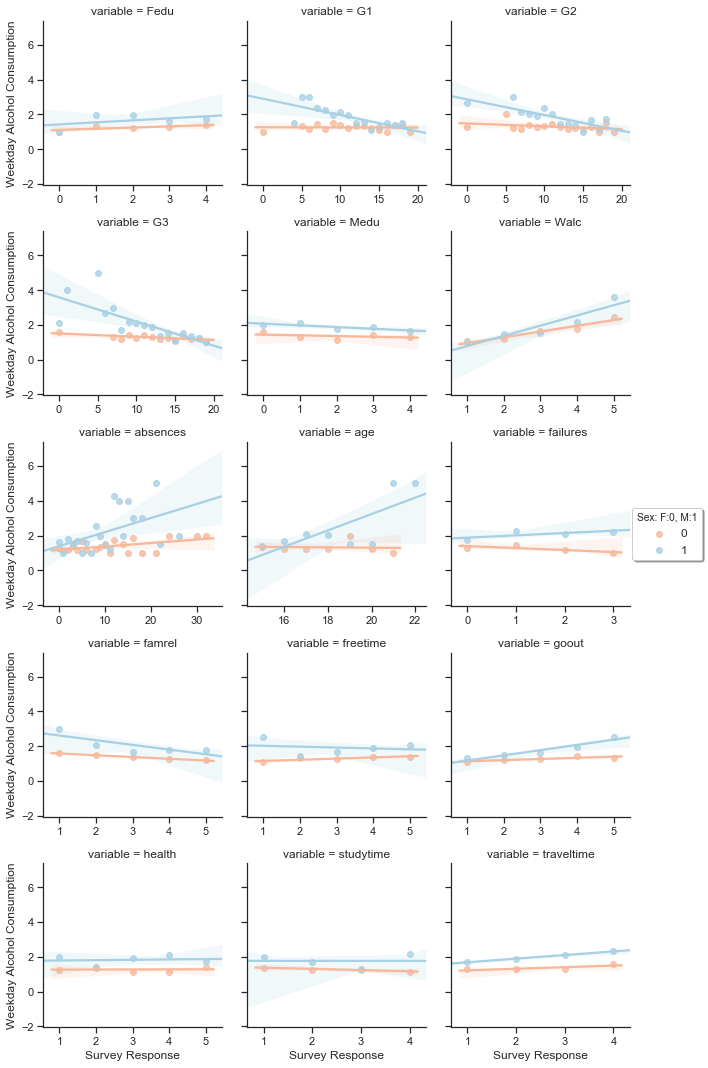

In [15]:
# melt the data to visualize weekday alcohol consumption compared to other variables
df_melt_Dalc = pd.melt(df_numerical.drop(
    ['index'], axis=1), id_vars=['sex', 'Dalc'])
df_melt_group_Dalc = df_melt_Dalc.groupby(['variable', 'value', 'sex'])[
    'Dalc'].mean().reset_index()

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  # Setting the overall aesthetic
g = sns.FacetGrid(df_melt_group_Dalc, col="variable", hue='sex',
                  palette='RdBu', col_wrap=3, legend_out=True, sharex=False)
g = g.map(sns.regplot, "value", 'Dalc').add_legend(
    title='Sex: F:0, M:1', frameon=True, shadow=True, fontsize='medium')
g.set_ylabels("Weekday Alcohol Consumption")
g.set_xlabels("Survey Response")

#plt.title('Scatterplot: Weekday Alcohol Consumption by Variable')
plt.show()

The blue lines indicate the average regression line for male workday alcohol consumption for the different variables while the pink lines indicate the same thing, but for females. 

Workday alcohol consumption seems to be positively correlated with age, absences, failures, free time, going out with friends, weekend alcohol consumption, and travel time, as indicated by a positive slope axis of the regression line.

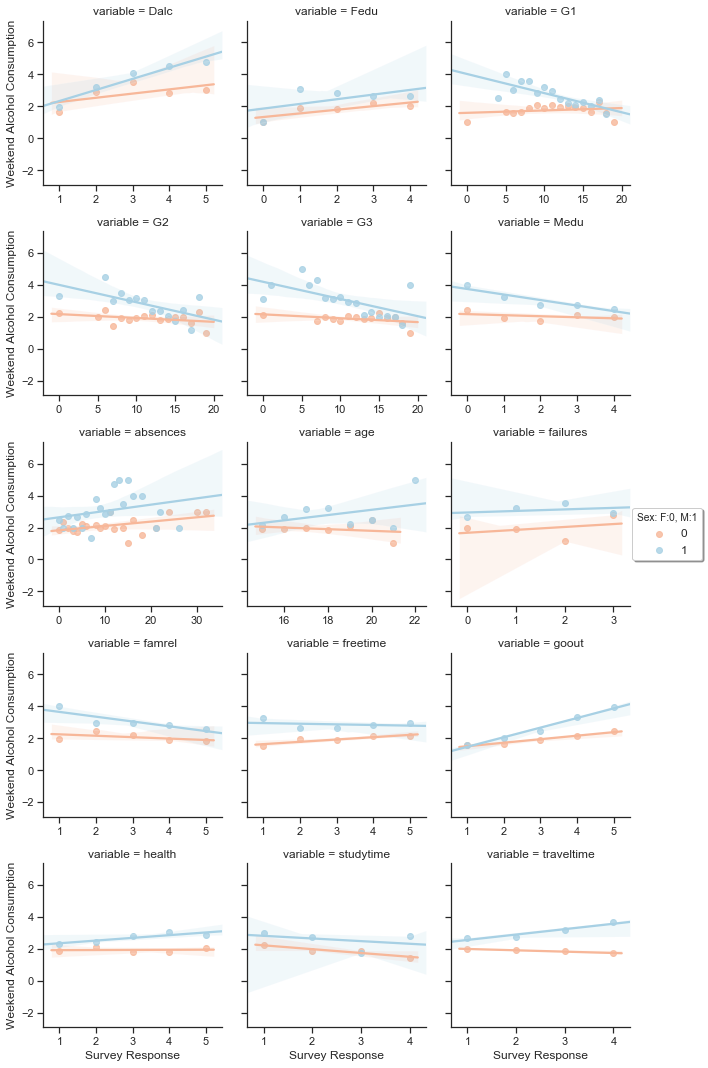

In [16]:
# melt the data to visualize weekend alcohol consumption compared to other variables
df_melt_Walc = pd.melt(df_numerical.drop(
    ['index'], axis=1), id_vars=['sex', 'Walc'])
df_melt_group_Walc = df_melt_Walc.groupby(['variable', 'value', 'sex'])[
    'Walc'].mean().reset_index()

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  # Setting the overall aesthetic
g = sns.FacetGrid(df_melt_group_Walc, col="variable",
                  hue='sex', palette='RdBu', col_wrap=3, sharex=False)
g = g.map(sns.regplot, "value", 'Walc').add_legend(
    title='Sex: F:0, M:1', frameon=True, shadow=True, fontsize='medium')
g.set_ylabels("Weekend Alcohol Consumption")
g.set_xlabels("Survey Response")

#plt.title('Scatterplot: Weekend Alcohol Consumption by variable')
plt.show()

Weekend alcohol consumption seems positively correlated with absences, age (males only), going out with friends, workday alcohol consumption, and travel time.

Let's put the data on a correlation matrix to better visualize what attributes are correlated together.

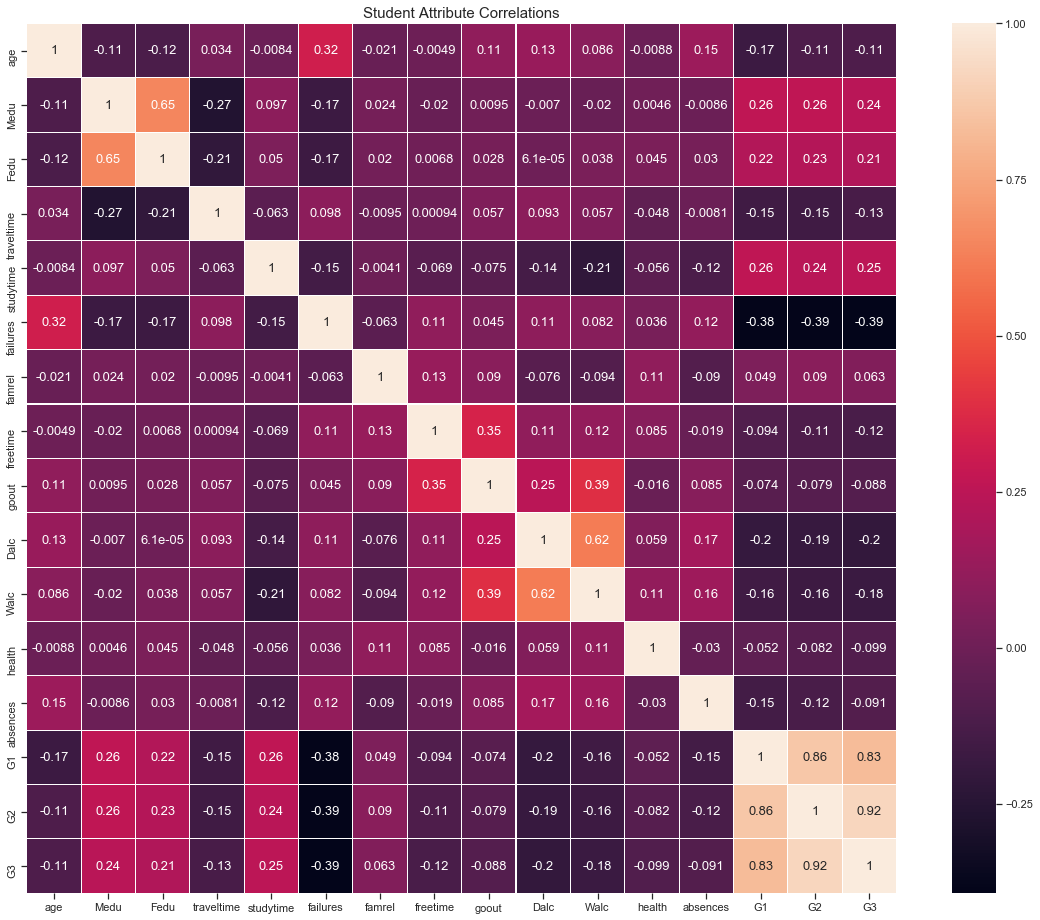

In [17]:
# Make the correlation matrix.
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 16))

# Draw the heatmap using seaborn.
fig = sns.heatmap(corrmat, linewidths=0.1, vmax=1.0,
                  square=True, linecolor='white', annot=True, annot_kws={"size": 13})
plt.title('Student Attribute Correlations', size=15)
figure = fig.get_figure()
figure.savefig('output.png')

plt.show()

The lighter colored squares indicate higher correlations than the darker purple colors. This verifies that the attributes we mentinoned earlier, age, travel time, free time, going out with friends, workday/weekend alcohol consumption. and absences are highly correlated with Walc/Dalc.

## For the purpose of this analysis, the data will be manipulated in such that plotting the data will allow for easier data visualization.  
First, the binary answers to the surver are changed to numerical 0's and 1's.  
Then, the ordinal answers are changed to dummy data. This means that all the responses are now included in the columns, but they will be filled with 0's (dummies) unless the student indicated that category as their answer to the survey (marked here as 1's). 

In [18]:
# make all the binary outcomes into numbers 0 and 1
# make address into a binary outcome (Rural = 0 and Urban = 1)
df_binary = pd.DataFrame()
df_binary['address'] = df['address'].map({'R': 0, 'U': 1})
# Pstatus- Parent's cohabitation status ('A' - living apart=0 and 'T' - living together=1)
df_binary['Pstatus'] = df['Pstatus'].map({'A': 0, 'T': 1})
# schoolsup- Extra educational support (binary: yes or no)
df_binary['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
# famsup- Family educational support (binary: yes or no)
df_binary['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
# paid- Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
df_binary['paid'] = df['paid'].map({'no': 0, 'yes': 1})
# activities- Extra-curricular activities (binary: yes or no)
df_binary['activities'] = df['activities'].map({'no': 0, 'yes': 1})
# nursery- Attended nursery school (binary: yes or no)
df_binary['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
# higher- Wants to take higher education (binary: yes or no)
df_binary['higher'] = df['higher'].map({'no': 0, 'yes': 1})
# internet- Internet access at home (binary: yes or no)
df_binary['internet'] = df['internet'].map({'no': 0, 'yes': 1})
# romantic- With a romantic relationship (binary: yes or no)
df_binary['romantic'] = df['romantic'].map({'no': 0, 'yes': 1})
df_binary['sex'] = df_numerical['sex']
df_binary['Dalc'] = df_numerical['Dalc']
df_binary['Walc'] = df_numerical['Walc']

# make dummies to turn categorical data into numbers. 0 means it is not that category, 1 means that's what the student indicated
df_numerical2 = df[['school', 'Mjob', 'Fjob', 'reason', 'guardian', 'famsize']]
df_numerical2 = pd.get_dummies(df_numerical2, columns=[
                               'school', 'Mjob', 'Fjob', 'reason', 'guardian', 'famsize'])

# add the two numerical dataframes together
results = pd.concat([df_binary, df_numerical2], axis=1)
results.head()

# add the results data frame with the numerical dataframe from before
total_data = pd.concat([df_binary, df_numerical], axis=1)

## We now have all of our data from the survey in numerical form!   
Therefore, we can now do some visualizations with all the data and can start to identify more trends for what attributed might be correlated together, and what might be good predictors to look at for predicting alcohol sumption in youth.

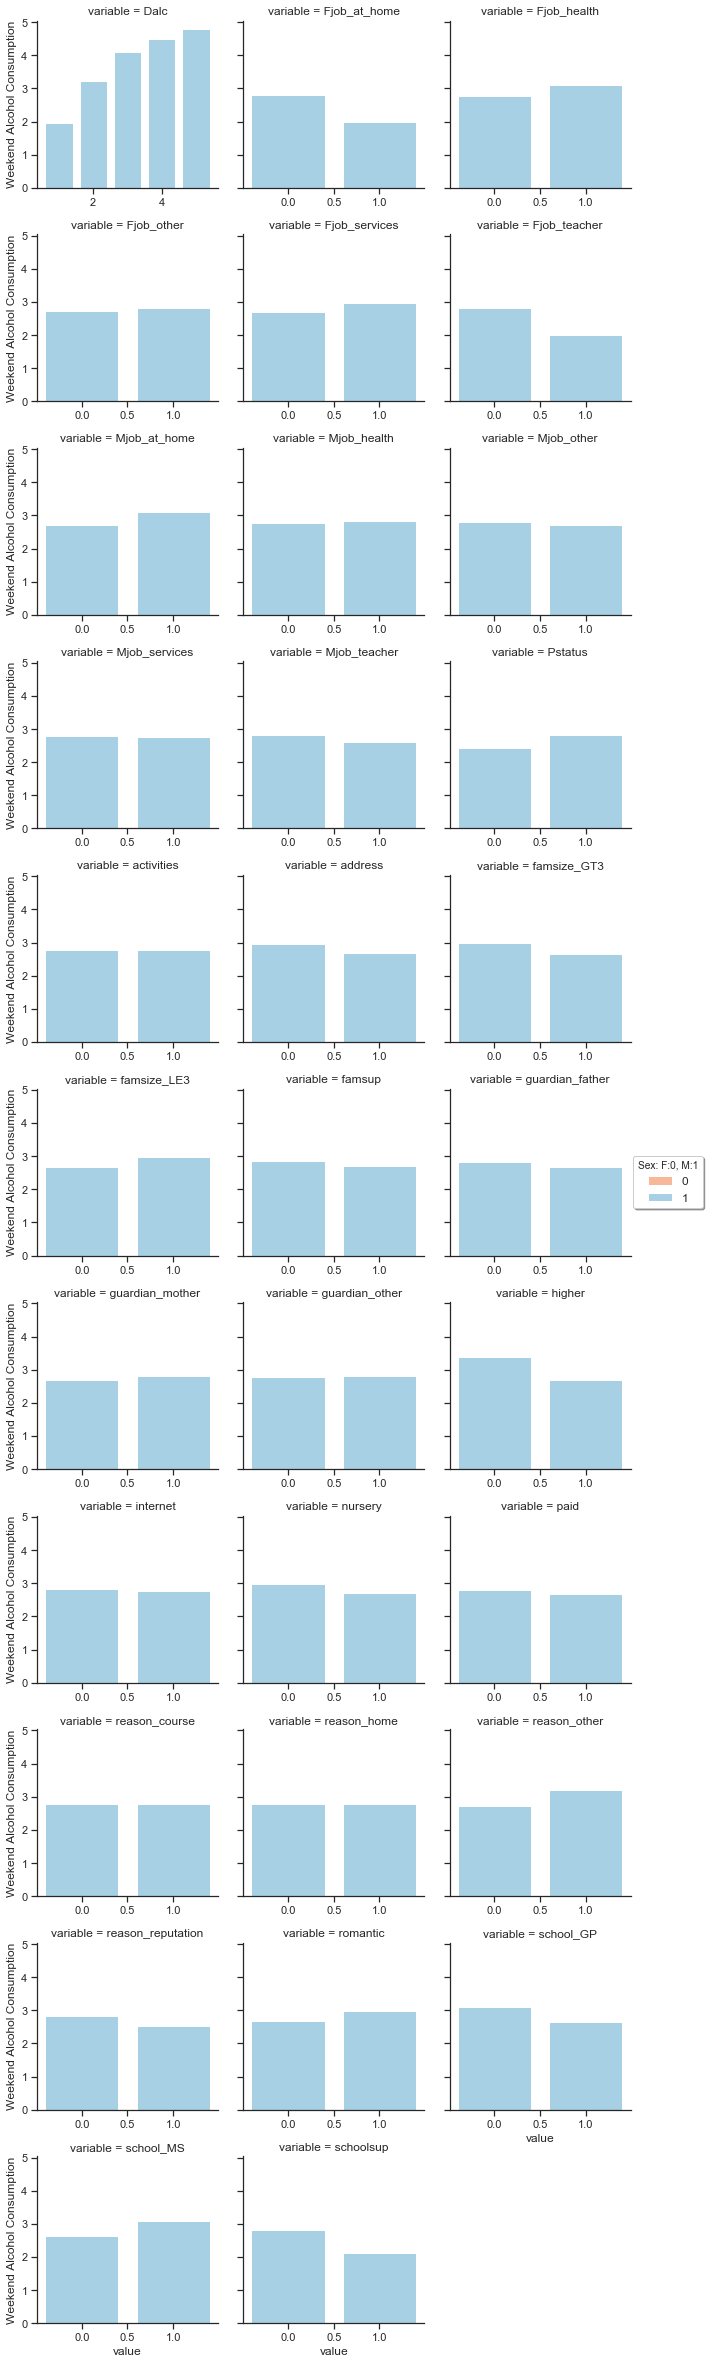

In [19]:
# melt the data to visualize weekend alcohol consumption compared to other variables
df_melt_Walc = results.melt(id_vars=['sex', 'Walc'])
df_melt_group_Walc = df_melt_Walc.groupby(['variable', 'value', 'sex'])[
    'Walc'].mean().reset_index()

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  # Setting the overall aesthetic
g = sns.FacetGrid(df_melt_group_Walc, col="variable",
                  hue='sex', palette='RdBu', col_wrap=3, sharex=False)
g = g.map(plt.bar, "value", 'Walc', edgecolor="w").add_legend(
    title='Sex: F:0, M:1', frameon=True, shadow=True, fontsize='medium')
g.set_ylabels("Weekend Alcohol Consumption")

#plt.title('Scatterplot: Weekend Alcohol Consumption by variable')
plt.show()

# Prediction time!
Attribute of interest: Walc, or the weekend alcohol consumption on a scale of 1-5, because it is more interesting (more students drink on weekends than weekdays so there is more of a variety to look at)

Classifier models we'll use:
Null accuracy  
Decision Tree  
Random Forest Classifier  
KNN Classifier  
Gradient Boosting Classifier  

In [20]:
# Define outcome and predictors
y = df_numerical['Walc']
x = df_numerical.loc[:, ~df_numerical.columns.isin(['Walc', 'index'])]

# Create training and test sets
offset = int(x.shape[0] * 0.8)

# Put 80% of data in training set
x_train, y_train = x[:offset], y[:offset]

#  Put 20% in the test set
x_test, y_test = x[offset:], y[offset:]

In [21]:
# Null accuracy
mode = y_train.mode().values[0]
(y_test == mode).mean()

0.3076923076923077

Assuming that all of the students got a 1, or low likelihood of drinking, we would obtain accurate results 0.30769, or 30.8% of the time. 

Let’s see if we can improve that accuracy measure 

# Decision Tree

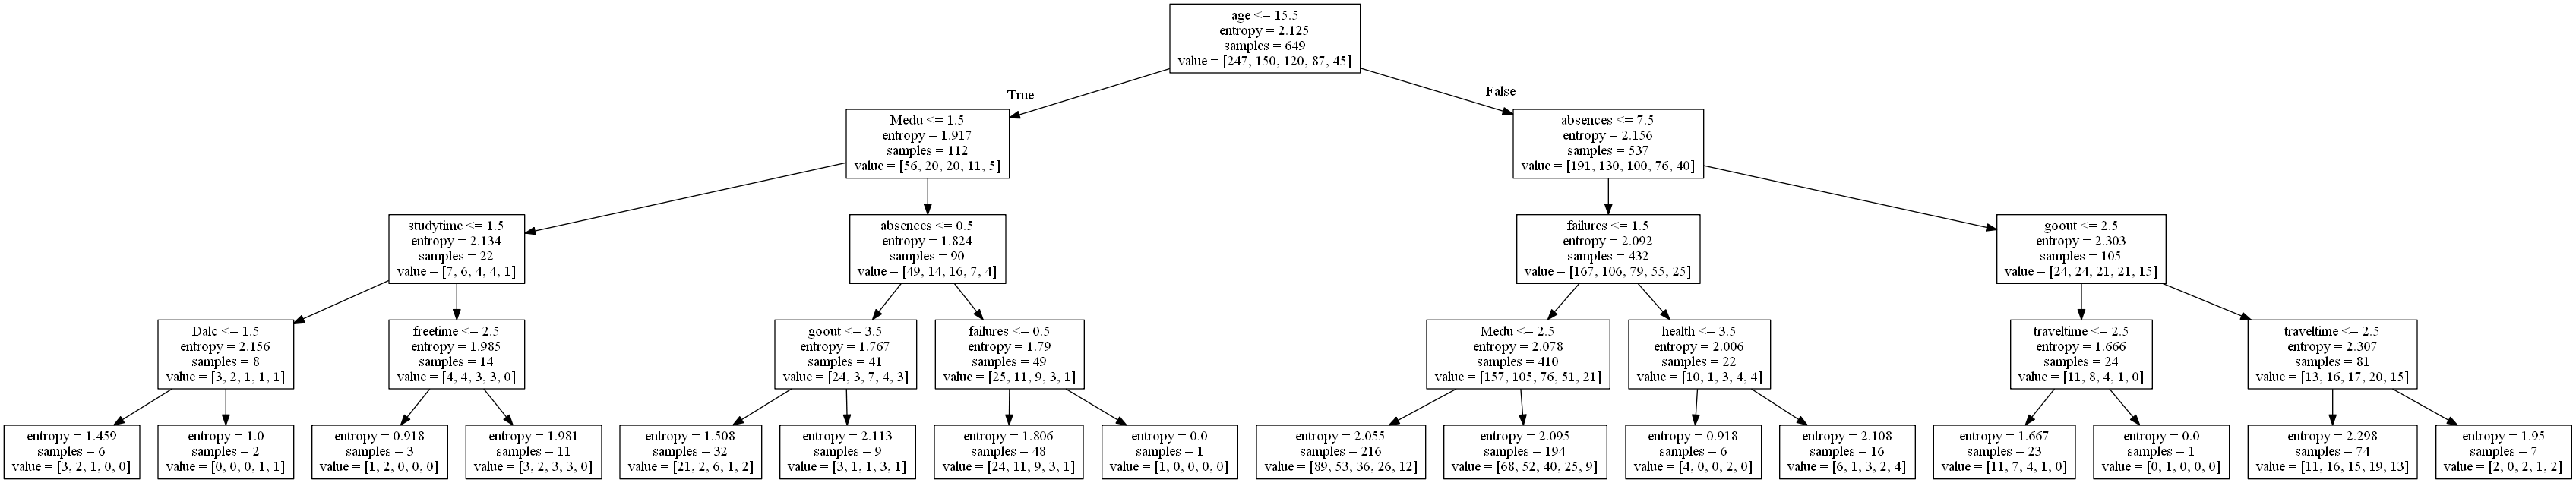

In [22]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state=42
)
decision_tree.fit(x, y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=x.columns,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Scoring Decision Tree

In [23]:
# Calculate accuracy and perform cross validation.
# Get accuracy score on test set.  Cross validate on training set.


def get_scores(classifier, x, y):

    # Cross validation.
    cv_train = cross_val_score(classifier, x, y, cv=5)
    plusminus = u"\u00B1"
    print('Cross validation results: {:.3%} {} {:.3%} \n {}'.format(
        cv_train.mean(), plusminus, cv_train.std(), cv_train))

    # Make class predictions for the testing set.
    y_pred_class = classifier.predict(x)

    # Calculate accuracy.
    print('Accuracy score:', round(metrics.accuracy_score(y, y_pred_class), 3))
    print()

In [24]:
get_scores(decision_tree, x, y)
# Get accuracy scores on training a_testnd test sets.
print('Decision Tree training accuracy score: ',
      round(decision_tree.score(x_train, y_train), 3))

Cross validation results: 37.738% ± 1.872% 
 [0.38931298 0.40458015 0.35658915 0.35658915 0.37984496]
Accuracy score: 0.398

Decision Tree training accuracy score:  0.418


Interestingly, the results for the decision tree classification method are WORSE than that of the null accuracy! Let's take a look at the confusion matrix to see why.

In [25]:
# Make class predictions for the confusion matrix.

predict_train = decision_tree.predict(x_train)
predict_test = decision_tree.predict(x_test)

# Accuracy tables.
table_train_dt = pd.crosstab(y_train, predict_train, margins=True)
table_test_dt = pd.crosstab(y_test, predict_test, margins=True)

In [26]:
table_train_dt

col_0,1,2,4,All
Walc,,,,
1,197,1,9,207
2,95,3,15,113
3,79,0,13,92
4,51,0,17,68
5,28,0,11,39
All,450,4,65,519


In [27]:
table_test_dt

col_0,1,4,All
Walc,,,
1,38,2,40
2,36,1,37
3,26,2,28
4,16,3,19
5,3,3,6
All,119,11,130


It seems like the decision trees focused a lot on just three outputs (1, 2, and 4 levels of Walc) for the training set and only 2 outputs for the test set (1 and 4). 

Let's try adding more trees in a random forest classifier to see if we can improve our scores!

# Random Forest

In [28]:
# base level random forest
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, x, y, cv=5)

array([0.45038168, 0.46564885, 0.48062016, 0.39534884, 0.41860465])

Already this random forest is performing better!
Let's check out what the best parms would be, and redo the RFC

In [29]:
num_est = []
accuracy_rfc = []

for value in [100, 500, 700]:
    rfc = RandomForestClassifier(n_estimators=value)
    accuracy_rfc.append(np.mean(cross_val_score(
        rfc, x, y, scoring='accuracy', cv=5, n_jobs=-1)))
    num_est.append(value)

In [30]:
df_rfc_est = pd.DataFrame(accuracy_rfc, columns=['accuracy'])
df_rfc_est['n_estimators'] = num_est
df_rfc_est.sort_values(by=['accuracy'], ascending=False)

,accuracy,n_estimators
1,0.500799,500
2,0.500752,700
0,0.497722,100


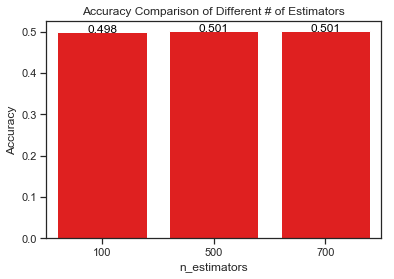

In [31]:
rf_est = sns.barplot(x='n_estimators', y='accuracy',
                     data=df_rfc_est, ci=68, color='red')
rf_est.set(ylabel='Accuracy',
           title='Accuracy Comparison of Different # of Estimators')
for n_estimators, row in df_rfc_est.iterrows():
    rf_est.text(row.name, row.accuracy, round(
        row.accuracy, 3), color='black', ha="center")
plt.show()

In [32]:
max_depth = []
accuracy_rfc = []

for values in [10, 15, 20, 50]:
    rfc = RandomForestClassifier(n_jobs=-1, max_depth=value, n_estimators=700)
    accuracy_rfc.append(np.mean(cross_val_score(
        rfc, x, y, cv=5, scoring='accuracy')))
    max_depth.append(values)

In [33]:
df_rfc_mxdep = pd.DataFrame(accuracy_rfc, columns=['accuracy'])
df_rfc_mxdep['max_depth'] = max_depth
df_rfc_mxdep.sort_values(by=['accuracy'], ascending=False)

,accuracy,max_depth
2,0.506929,20
0,0.503923,10
3,0.500752,50
1,0.499272,15


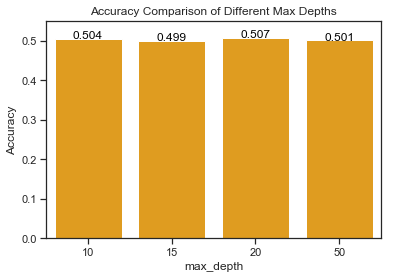

In [34]:
rf_mxdep = sns.barplot(x='max_depth', y='accuracy',
                       data=df_rfc_mxdep, ci=68, color='Orange')
rf_mxdep.set(ylabel='Accuracy',
             title='Accuracy Comparison of Different Max Depths')
plt.ylim(0, 0.55)
for max_depth, row in df_rfc_mxdep.iterrows():
    rf_mxdep.text(row.name, row.accuracy, round(
        row.accuracy, 3), color='black', ha="center")
plt.show()

Though the best numbers of max_depth and n_estimators change each time you run the notebook (because it chooses different train and test sets each time), for this time, it seems like it is best with max_depth of 20 and n_est of 700.

In [35]:
rfc = RandomForestClassifier(max_depth=20, n_estimators=700)
cross_val_score(rfc, x, y, cv=5)

array([0.52671756, 0.44274809, 0.51937984, 0.49612403, 0.49612403])

Nice! The accuracy has gone up even more!   
Let's take a look at the confusion matrix here.

In [36]:
# Examine the class distribution of the testing set.
print(y_test.value_counts())
rfc.fit(x, y)
predict_train_rfc = rfc.predict(x_train)
predict_test_rfc = rfc.predict(x_test)

# Accuracy tables.
table_train_rfc = pd.crosstab(y_train, predict_train, margins=True)
table_test_rfc = pd.crosstab(y_test, predict_test, margins=True)

1    40
2    37
3    28
4    19
5     6
Name: Walc, dtype: int64


In [37]:
table_train_rfc

col_0,1,2,4,All
Walc,,,,
1,197,1,9,207
2,95,3,15,113
3,79,0,13,92
4,51,0,17,68
5,28,0,11,39
All,450,4,65,519


In [38]:
table_test_rfc

col_0,1,4,All
Walc,,,
1,38,2,40
2,36,1,37
3,26,2,28
4,16,3,19
5,3,3,6
All,119,11,130


Perhaps we need to do a gradient boosting classifier to put all that we've learned together.

# Gradient Boosting Classifier

In [60]:
# We'll make 1000 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(x_train, y_train)

predict_train = clf.predict(x_train)
predict_test = clf.predict(x_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

In [62]:
table_train

col_0,1,2,3,4,5,All
Walc,,,,,,
1,207,0,0,0,0,207
2,3,110,0,0,0,113
3,1,0,91,0,0,92
4,0,0,0,68,0,68
5,0,0,0,0,39,39
All,211,110,91,68,39,519


In [69]:
table_test

col_0,1,2,3,4,5,All
Walc,,,,,,
1,23,12,5,0,0,40
2,13,10,8,6,0,37
3,8,6,3,7,4,28
4,3,5,2,8,1,19
5,0,1,0,1,4,6
All,47,34,18,22,9,130


In [64]:
# score
cross_val_score(clf, x, y, cv=5)

array([0.4351145 , 0.40458015, 0.43410853, 0.33333333, 0.42635659])

Interesting~ The gradient boosting classifier performed more poorly than the random forest. Let's try and check out our features to see if we can change that, or if that really is the best model for this data set.

# Pit Stop!
## Feature Analysis- Determine the most important features

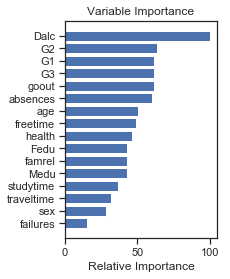

In [44]:
# according to the Random Forest, what are the most important features?
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The above graph lists the top 16 features that are important for predicting Walc in these students.


# Feature Engineering

In [51]:
# get rid of outliers in age
df_under_20 = pd.DataFrame()
df_under_20 = df_numerical.copy()
df_under_20 = df_under_20.drop(['index'], axis=1)
df_under_20['age'] = df_under_20['age'].astype(float)
df_under_20 = df_under_20[df_under_20['age'] <= 20]
y_under_20 = df_under_20['Walc']

In [52]:
df_under_20['age'].unique()

array([18., 17., 15., 16., 19., 20.])

In [53]:
df_minus_lower = df_numerical[['G2', 'G3', 'absences', 'G3', 'freetime', 'Dalc',
                                           'Medu', 'age', 'Fedu', 'health', 'famrel', 'traveltime', 'goout', 'studytime', 'sex', 'failures', 'Walc']]
df_minus_lower_u20 = df_under_20[['G2', 'G3', 'absences', 'G3', 'freetime', 'Dalc',
                                  'Medu', 'age', 'Fedu', 'health', 'famrel', 'traveltime', 'goout', 'studytime', 'sex', 'failures', 'Walc']]

In [54]:
# Create Features -- doing this in one place makes it easy to re-run
# Dummies will be created on all the categorical data and will ignore numerical data
pca = PCA(n_components=5)

y = df['Walc']
X_numerical = pd.get_dummies(df_numerical.drop(['Walc', 'index'], axis=1))
X_under_20 = pd.get_dummies(df_under_20.drop('Walc', axis=1))
X_under_20_PCA = pca.fit_transform(X_under_20)
# has 3 more students than the under20 groups
X_minus_lower = pd.get_dummies(df_minus_lower.drop(['Walc'], axis=1))
X_minus_lower_u20 = pd.get_dummies(df_minus_lower_u20.drop(['Walc'], axis=1))
X_minus_lower_u20_PCA = pca.fit_transform(X_minus_lower_u20)

In [57]:
# Here I am defining some models to be used for classification

dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
X_big = [X_numerical, X_under_20, X_under_20_PCA,
         X_minus_lower, X_minus_lower_u20, X_minus_lower_u20_PCA]
methods_big = [dt, kn, gb, rfc]
Y_big = [y, y_under_20, y_under_20, y, y_under_20, y_under_20]

In [58]:
# Doing all the magic here!
# df_results will store my cross-validation results for each combination of data/method
# I am doing two loops, one over method, another over the data source
# The _name variables are just for making the dataframe labels pretty

df_results = pd.DataFrame()
methods_name = ['DT', 'KN', 'GradBoost', 'RF']
data_name = ['full', 'under_20', 'under_20_PCA', 'minus_lower',
             'under_20_minus_lower', 'under_20_minus_lower_PCA']
for didx in range(0, len(X_big)):
    for midx in range(0, len(methods_big)):
        print("Running: " + methods_name[midx] + " + " + data_name[didx])
        # For the given method (lin, kn) and the data (full, trans, reduced)
        # Do a 5 fold cross-validation and average the results together and store in "res"
        res = np.mean(cross_val_score(methods_big[midx],
                                      X=X_big[didx],
                                      y=Y_big[didx],
                                      cv=5))
        # Add the simulation results to the df_results frame
        # The pd.DataFrame in the middle creates a one-line dataframe with the right info
        # The .append adds that new frame to the df_results frame
        df_results = df_results.append(pd.DataFrame({'method': [methods_name[midx]],
                                                     'data': [data_name[didx]],
                                                     'cv_res': [res]}))
print("Done!")

Running: DT + full
Running: KN + full
Running: GradBoost + full
Running: RF + full
Running: DT + under_20
Running: KN + under_20
Running: GradBoost + under_20
Running: RF + under_20
Running: DT + under_20_PCA
Running: KN + under_20_PCA
Running: GradBoost + under_20_PCA
Running: RF + under_20_PCA
Running: DT + minus_lower
Running: KN + minus_lower
Running: GradBoost + minus_lower
Running: RF + minus_lower
Running: DT + under_20_minus_lower
Running: KN + under_20_minus_lower
Running: GradBoost + under_20_minus_lower
Running: RF + under_20_minus_lower
Running: DT + under_20_minus_lower_PCA
Running: KN + under_20_minus_lower_PCA
Running: GradBoost + under_20_minus_lower_PCA
Running: RF + under_20_minus_lower_PCA
Done!


In [59]:
# Now we can look at the results for each combination of data and method
# The full data frame is winning
# RF > OLS > Grad Boosting > KN


df_results.sort_values(by='cv_res', ascending=False)

,cv_res,data,method
0,0.509221,under_20,RF
0,0.500752,full,RF
0,0.496195,minus_lower,RF
0,0.482959,under_20_minus_lower,RF
0,0.457577,minus_lower,GradBoost
0,0.447187,under_20_minus_lower,GradBoost
0,0.442168,full,GradBoost
0,0.439372,under_20,GradBoost
0,0.376500,under_20_minus_lower,DT
0,0.368270,full,DT


# Concluding remarks

Our purpose of this study was to determine what attributes are correlated with Portuguese secondary student weekend alcohol consumption, and to figure out what supervised learning classifier is the best method to determining that info.

We looked at 33 features and determined that the likelihood of workday alcohol consumption; 1st period, 2nd period, and final grades; likelihood of going out with friends; number of absences; age; amount of free time; quality of health; father's education level; quality of family relationships; mother's education level; amount of time studying were most correlated with student alcohol consumption on weekends.

We looked at 5 different classifiers that I learned in the Thinkful Data Science course so far, and we saw that the __random forest__ performed on __the students aged 20 and younger__ led to the best prediction accuracy of 50.9%.

This study has implications for identifying the target groups that alcohol abuse campaigns can focus their efforts towards. Additionally, we see that this data can be further explored to examine othercorrelations between underaged alcohol abuse, and see how that can interacts with other qualities of the students' lives. Perhaps this data can be used to argue for or against changing the drinking age in the United States. Who knows, maybe more studies like this will lead to European countries to __increase__ their legal drinking age!